# Network diagram

In [ ]:
# They link the nodes with edges, which can be directed or inderected.
# We can represent this networks through adjecency matrices, and then use libraries such as NetworkX to visualize and
# apply certain algorithms to answer interesting questions.

__Tree networks__

In [ ]:
# Tree networks are networks with a hierarchy, where there's a node at the top (root) and subsequent nodes appear in
# underneath levels, connected to the nodes above. These connections can be singular (connection with only one node above)
# or multiple when a node is connected to various upper nodes.

In [ ]:
# Structures are representations that we impose in the data

# Connected Components

In [1]:
# You can think of Connected Components as a sorf of a hard clustering algorithm which finds clusters/islands in connected/
#related data

In [3]:
# Example
import networkx as nx
edgelist = [['Mannheim', 'Frankfurt', 85], ['Mannheim', 'Karlsruhe', 80], ['Erfurt', 'Wurzburg', 186], ['Munchen', 'Numberg', 167], ['Munchen', 'Augsburg', 84], ['Munchen', 'Kassel', 502], ['Numberg', 'Stuttgart', 183], ['Numberg', 'Wurzburg', 103], ['Numberg', 'Munchen', 167], ['Stuttgart', 'Numberg', 183], ['Augsburg', 'Munchen', 84], ['Augsburg', 'Karlsruhe', 250], ['Kassel', 'Munchen', 502], ['Kassel', 'Frankfurt', 173], ['Frankfurt', 'Mannheim', 85], ['Frankfurt', 'Wurzburg', 217], ['Frankfurt', 'Kassel', 173], ['Wurzburg', 'Numberg', 103], ['Wurzburg', 'Erfurt', 186], ['Wurzburg', 'Frankfurt', 217], ['Karlsruhe', 'Mannheim', 80], ['Karlsruhe', 'Augsburg', 250],["Mumbai", "Delhi",400],["Delhi", "Kolkata",500],["Kolkata", "Bangalore",600],["TX", "NY",1200],["ALB", "NY",800]]


In [4]:
g = nx.Graph()
for edge in edgelist:
    g.add_edge(edge[0],edge[1], weight = edge[2])

In [5]:
for i, x in enumerate(nx.connected_components(g)):
    print("cc"+str(i)+":",x)

cc0: {'Stuttgart', 'Munchen', 'Frankfurt', 'Mannheim', 'Augsburg', 'Kassel', 'Erfurt', 'Numberg', 'Wurzburg', 'Karlsruhe'}
cc1: {'Delhi', 'Mumbai', 'Bangalore', 'Kolkata'}
cc2: {'ALB', 'NY', 'TX'}


__Shortest Path__

In [6]:
# From our connected components, we can calculate the shortest path using the Dijkstra algorithm
print(nx.shortest_path(g, 'Stuttgart','Frankfurt',weight='weight'))
print(nx.shortest_path_length(g, 'Stuttgart','Frankfurt',weight='weight'))

['Stuttgart', 'Numberg', 'Wurzburg', 'Frankfurt']
503


In [7]:
for x in nx.all_pairs_dijkstra_path(g,weight='weight'):
    print(x)

('Mannheim', {'Mannheim': ['Mannheim'], 'Frankfurt': ['Mannheim', 'Frankfurt'], 'Karlsruhe': ['Mannheim', 'Karlsruhe'], 'Augsburg': ['Mannheim', 'Karlsruhe', 'Augsburg'], 'Kassel': ['Mannheim', 'Frankfurt', 'Kassel'], 'Wurzburg': ['Mannheim', 'Frankfurt', 'Wurzburg'], 'Munchen': ['Mannheim', 'Karlsruhe', 'Augsburg', 'Munchen'], 'Erfurt': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Erfurt'], 'Numberg': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Numberg'], 'Stuttgart': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Numberg', 'Stuttgart']})
('Frankfurt', {'Frankfurt': ['Frankfurt'], 'Mannheim': ['Frankfurt', 'Mannheim'], 'Kassel': ['Frankfurt', 'Kassel'], 'Wurzburg': ['Frankfurt', 'Wurzburg'], 'Karlsruhe': ['Frankfurt', 'Mannheim', 'Karlsruhe'], 'Augsburg': ['Frankfurt', 'Mannheim', 'Karlsruhe', 'Augsburg'], 'Munchen': ['Frankfurt', 'Wurzburg', 'Numberg', 'Munchen'], 'Erfurt': ['Frankfurt', 'Wurzburg', 'Erfurt'], 'Numberg': ['Frankfurt', 'Wurzburg', 'Numberg'], 'Stuttgart': ['Frankfurt', 'Wurzburg', 'Numb

__Minimum Spanning Tree__

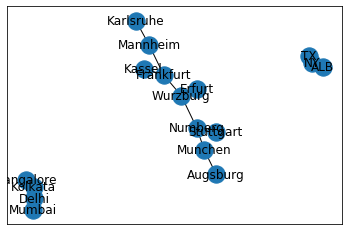

In [9]:
# It seves us to connect all the connected components using the minimum accumulated weight/distance
# nx.minimum_spanning_tree(g) returns a instance of type graph
nx.draw_networkx(nx.minimum_spanning_tree(g))

__Pagerank__

In [ ]:
# Pagerank can be used anywhere where we want to estimate node importance in any network 

In [13]:
# Example
# reading the dataset
fb = nx.read_edgelist('datasets/facebook-combined', create_using = nx.Graph(), nodetype = int)

In [ ]:
pos = nx.spring_layout(fb)

import warnings
import matplotlib as plt
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(fb, pos, with_labels = False, node_size = 35)
plt.show()

In [ ]:
pageranks = nx.pagerank(fb)
print(pageranks)

In [ ]:
import operator
sorted_pagerank = sorted(pageranks.items(), key=operator.itemgetter(1),reverse = True)
print(sorted_pagerank)

In [ ]:
first_degree_connected_nodes = list(fb.neighbors(3437))
second_degree_connected_nodes = []
for x in first_degree_connected_nodes:
    second_degree_connected_nodes+=list(fb.neighbors(x))
second_degree_connected_nodes.remove(3437)
second_degree_connected_nodes = list(set(second_degree_connected_nodes))
subgraph_3437 = nx.subgraph(fb,first_degree_connected_nodes+second_degree_connected_nodes)
pos = nx.spring_layout(subgraph_3437)
node_color = ['yellow' if v == 3437 else 'red' for v in subgraph_3437]
node_size =  [1000 if v == 3437 else 35 for v in subgraph_3437]
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(subgraph_3437, pos, with_labels = False, node_color=node_color,node_size=node_size )
plt.show()

__Centrality measures__

In [ ]:
# Centrality measures can be used as features to our machine learning models. 
# A couple of examples of centrality measures:

## Betweenness centrality quantifies how many times a particular node comes in the shortest chosen path between two other 
# nodes.

## Degree centrality is simply the number of connections for a node.

pos = nx.spring_layout(subgraph_3437)
betweennessCentrality = nx.betweenness_centrality(subgraph_3437,normalized=True, endpoints=True)
node_size =  [v * 10000 for v in betweennessCentrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(subgraph_3437, pos=pos, with_labels=False,
                 node_size=node_size )
plt.axis('off')